# Pymaceuticals Inc.
---

### Analysis

In this study, mice with tumors were treated with various drug regimens, including Capomulin, Ramicane, and others. The data indicate that Capomulin and Ramicane are the most effective in reducing tumor volumes. These two drugs showed the smallest tumor volumes, indicating better efficacy in treating the tumors compared to other drugs in the study.

Additionally, the analysis included a correlation study between the weight of the mice and the average tumor volume. It was found that there is a significant correlation, suggesting that mouse weight may be a factor in tumor growth.

Overall, the data suggest that Capomulin and Ramicane are the most promising drugs in this study for reducing tumor size, while other drugs showed higher variability and less effectiveness. Further studies could be beneficial to confirm these findings.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_db = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_db.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_db["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates_db = merged_db.loc[merged_db.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicates_db

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_db = merged_db[merged_db.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicates_db

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_db = merged_db[merged_db["Mouse ID"].isin(duplicates_db) == False]
clean_db

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_db["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_db = clean_db.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = grouped_db["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_db["Tumor Volume (mm3)"].median()
variance_tumor_volume = grouped_db["Tumor Volume (mm3)"].var()
std_tumor_volume = grouped_db["Tumor Volume (mm3)"].std()
sem_tumor_volume = grouped_db["Tumor Volume (mm3)"].sem()

grouped_db_by_drug = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
    
})

grouped_db_by_drug

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_db = clean_db.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_db

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

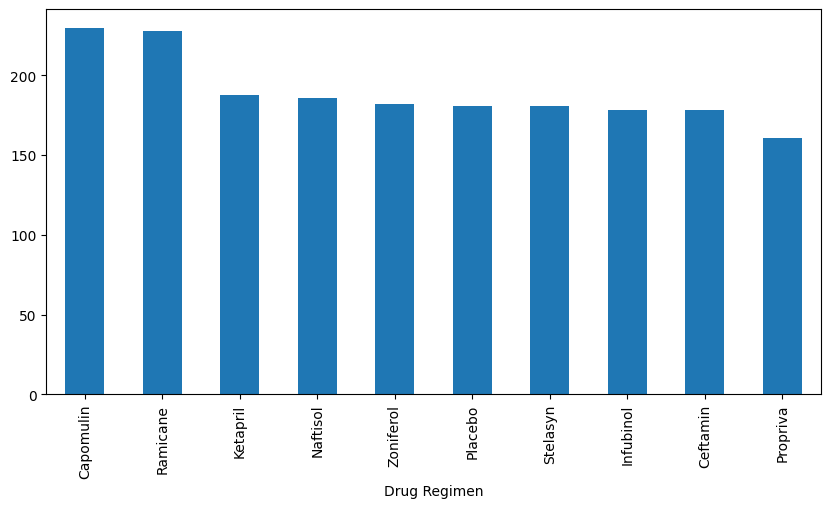

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_by_drug = clean_db["Drug Regimen"].value_counts()
plot_by_drug = plot_by_drug.plot(kind="bar", figsize=(10, 5))

Text(0, 0.5, 'Number of Rows (Mouse ID/Timepoints)')

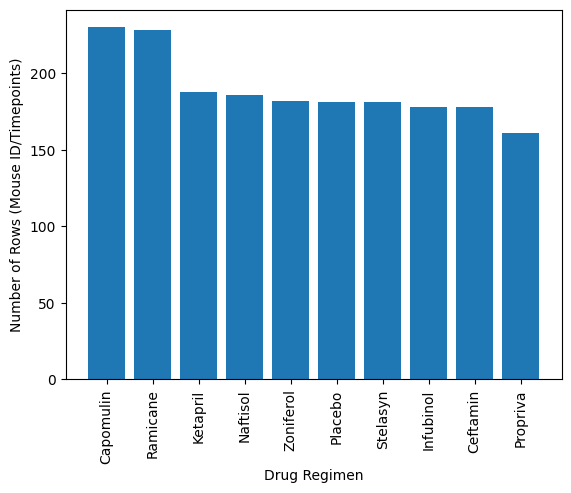

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_rows = clean_db["Drug Regimen"].value_counts()
plt.bar(total_rows.index.values, total_rows.values,)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")

(-1.0999999788716839,
 1.0999999989938898,
 -1.099999975510934,
 1.099999995761131)

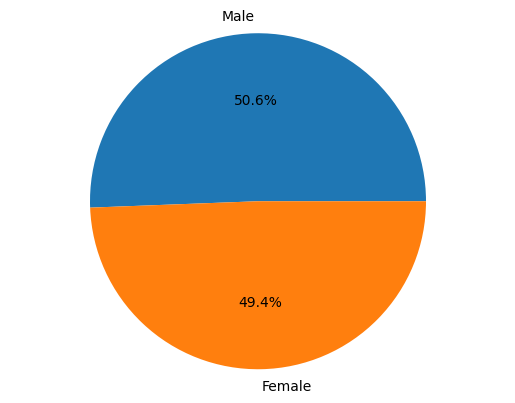

In [15]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
plt.pie(clean_db["Sex"].value_counts(), labels=clean_db["Sex"].value_counts().index, autopct="%1.1f%%")
plt.axis("equal")



(-1.0999999990874378,
 1.0999999999565446,
 -1.0999999990491296,
 1.0999999998352412)

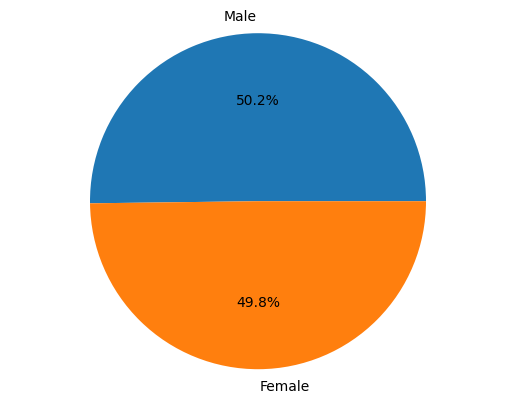

In [12]:
# Get the unique mice with their gender
unique_mice = clean_db.drop_duplicates(subset=["Mouse ID"])
gender_counts = unique_mice["Sex"].value_counts()

# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")
plt.axis("equal")


(-1.0999999990874378,
 1.0999999999565446,
 -1.0999999990491296,
 1.0999999998352412)

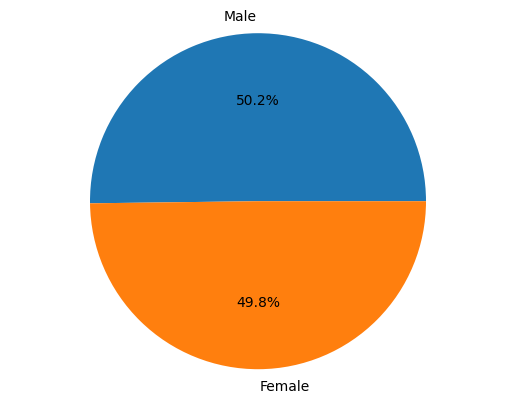

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")
plt.axis("equal")


(-1.0999999990874378,
 1.0999999999565446,
 -1.0999999990491296,
 1.0999999998352412)

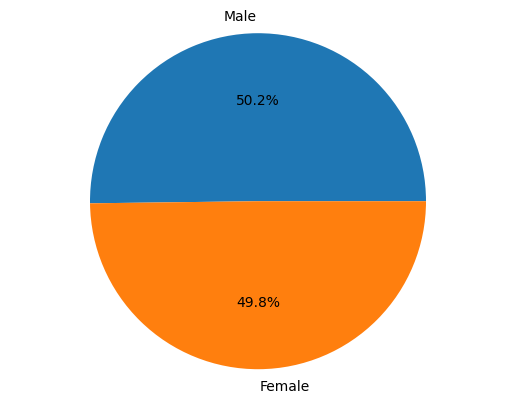

In [14]:
# Get the unique mice with their gender
unique_mice = clean_db.drop_duplicates(subset=["Mouse ID"])
gender_counts = unique_mice["Sex"].value_counts()

# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_volume = clean_db.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"].last()
tumor_volume






Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Zoniferol     q633        70.827796
              s337        62.109651
              w140        47.717952
              w575        68.401286
              x613        48.077646
Name: Tumor Volume (mm3), Length: 249, dtype: float64

In [17]:
# Start by getting the last (greatest) timepoint for each mouse
tumor_volume = tumor_volume.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_db = pd.merge(clean_db, tumor_volume, on=["Drug Regimen", "Mouse ID"], suffixes=("", "_last"))
clean_db

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Volume (mm3)_last
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,73.867845
1889,z969,Naftisol,Male,9,30,30,65.841013,3,73.867845
1890,z969,Naftisol,Male,9,30,35,69.176246,4,73.867845
1891,z969,Naftisol,Male,9,30,40,70.314904,4,73.867845


In [18]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
potential_outliers = {}
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    final = clean_db.loc[clean_db["Drug Regimen"] == treatment]
    tumor_vol_data.append(final["Tumor Volume (mm3)"])
    
for index, treatment in enumerate(treatments):
    quartiles = tumor_vol_data[index].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
# Determine outliers using upper and lower bounds    
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    outliers = tumor_vol_data[index][(tumor_vol_data[index] < lower_bound) | (tumor_vol_data[index] > upper_bound)]
    potential_outliers[treatment] = outliers

for treatment in potential_outliers:
    print(f"Potential Outliers for {treatment}:")
    print(potential_outliers[treatment])
    print()



Potential Outliers for Capomulin:
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

Potential Outliers for Ramicane:
9    22.050126
Name: Tumor Volume (mm3), dtype: float64

Potential Outliers for Infubinol:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Potential Outliers for Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)



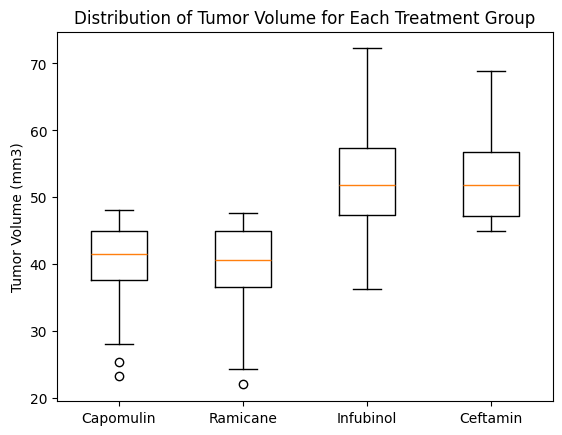

In [19]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume for Each Treatment Group")
plt.show()  

## Line and Scatter Plots

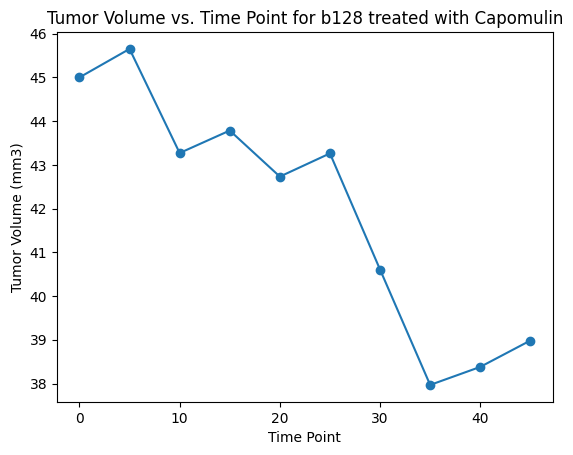

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse = "b128"
selected_drug = "Capomulin" 

# Filter the DataFrame for the selected mouse and drug
mouse_data = clean_db[(clean_db["Mouse ID"] == selected_mouse) & (clean_db["Drug Regimen"] == selected_drug)]

# Plotting tumor volume vs. time point
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o')

# Labeling the axes and setting the title
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Time Point for {selected_mouse} treated with {selected_drug}")

# Display the plot
plt.show()

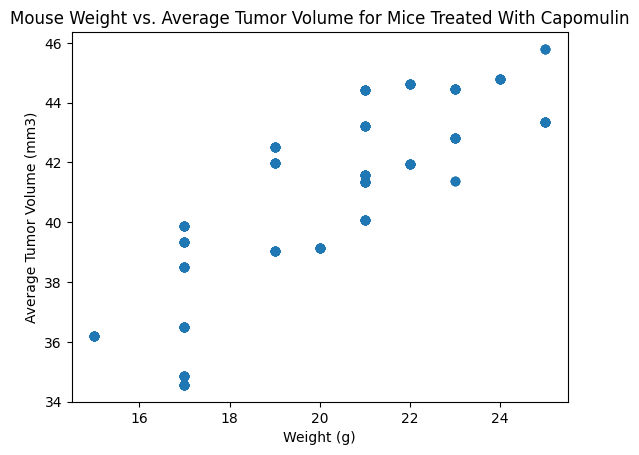

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_regimen = clean_db[clean_db['Drug Regimen'] == 'Capomulin']

average_tumor_volume = clean_db.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
mean_tumor_capomulin = pd.merge(average_tumor_volume, capo_regimen[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='inner')

# Plot mouse weight vs. average tumor volume
plt.scatter(mean_tumor_capomulin['Weight (g)'], mean_tumor_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Mice Treated With Capomulin')
plt.show()

## Correlation and Regression

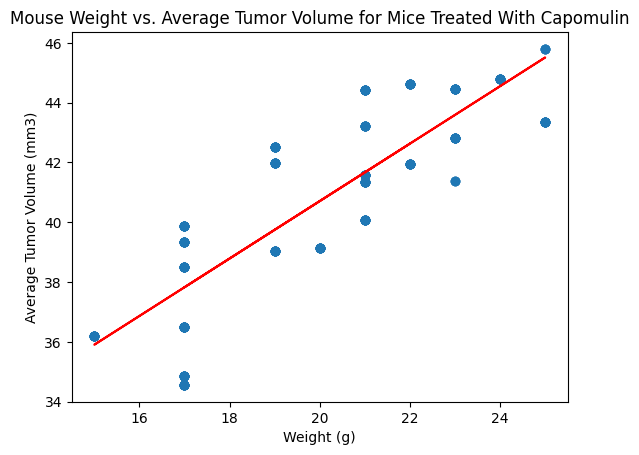

In [22]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(clean_db['Weight (g)'], clean_db['Tumor Volume (mm3)'])
slope, intercept, rvalue, pvalue, stderr = st.linregress(mean_tumor_capomulin['Weight (g)'], mean_tumor_capomulin['Tumor Volume (mm3)'])

plt.scatter(mean_tumor_capomulin['Weight (g)'], mean_tumor_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Mice Treated With Capomulin')
#Linear Regression Line
lin_equation = slope * mean_tumor_capomulin['Weight (g)'] + intercept
plt.plot(mean_tumor_capomulin['Weight (g)'], lin_equation, color='red')
plt.show()